

## **Project 1 : Comprehensive Regression Analysis**

# **Name : Debyendu Routh**




# **Let's Start ....**

In [ ]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

# **LOADING THE DATA SET**

In [ ]:
df = pd.read_csv("google_stock_price.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4837,2023-11-06,130.220001,131.559998,129.929993,131.449997,131.449997,15360400
4838,2023-11-07,131.979996,133.279999,131.139999,132.399994,132.399994,19223800
4839,2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
4840,2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500


<Axes: title={'center': 'distribution of the closing price'}, xlabel='values of closing price', ylabel='Frequency'>

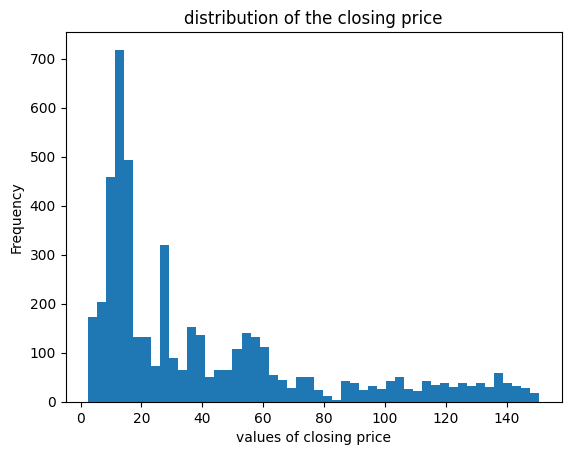

In [ ]:
df['Close'].plot(kind='hist', bins=50, xlabel = 'values of closing price', ylabel = 'Frequency',title = 'distribution of the closing price' )

<Axes: title={'center': 'distribution of the low price'}, xlabel='values of low price', ylabel='Frequency'>

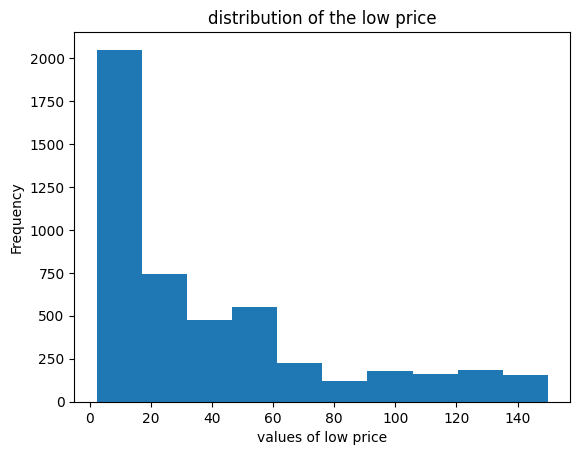

In [ ]:
df['Low'].plot(kind = 'hist', xlabel = 'values of low price', ylabel = 'Frequency',title = 'distribution of the low price')

<Axes: title={'center': 'distribution of High price'}, ylabel='Frequency'>

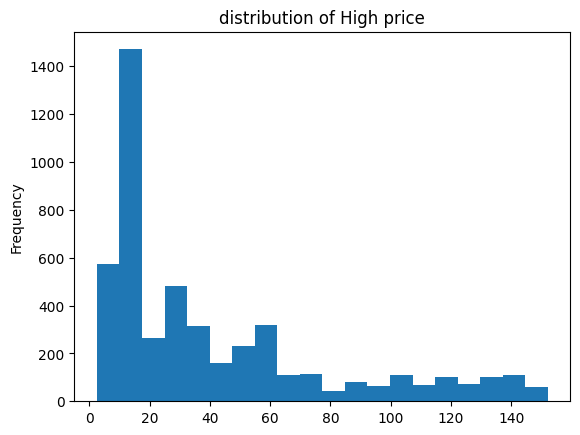

In [ ]:
df['High'].plot(kind='hist', bins=20, title='distribution of High price')

<Axes: title={'center': 'distribution of Open price'}, ylabel='Frequency'>

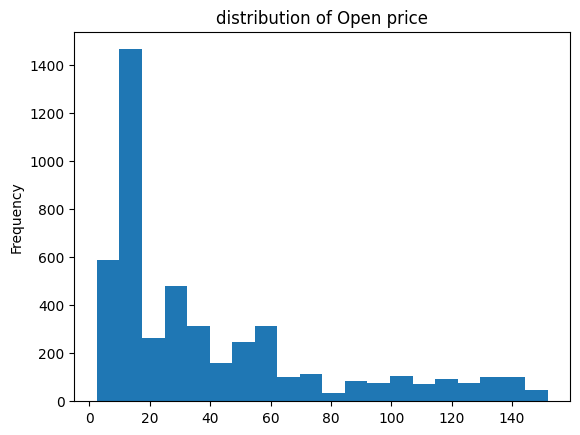

In [ ]:
df['Open'].plot(kind='hist', bins=20, title='distribution of Open price')

# **DATA INFORMATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842 entries, 0 to 4841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4842 non-null   object 
 1   Open       4842 non-null   float64
 2   High       4842 non-null   float64
 3   Low        4842 non-null   float64
 4   Close      4842 non-null   float64
 5   Adj Close  4842 non-null   float64
 6   Volume     4842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 264.9+ KB


# **NAN VALUE CHECKING**

In [ ]:
df['Close'].isna().sum()

0

In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


# **DATA DESCRIPTION**



In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4842.000000,4842.000000,4842.000000,4842.000000,4842.000000,4.842000e+03
mean,41.164402,41.601906,40.745188,41.181457,41.181457,1.192432e+08
std,38.267895,38.708231,37.871644,38.295204,38.295204,1.513840e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.819761,12.949089,12.702388,12.828043,12.828043,2.867350e+07
50%,26.470161,26.668148,26.259000,26.470153,26.470153,6.202500e+07
75%,57.197751,57.729501,56.633139,57.315001,57.315001,1.469819e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


# **HOW MUCH ONE FEATURE IS RELATED TO OTHER ONE ** ****

In [ ]:
df['Open'].corr(df['High'])

0.9999024265636497

In [ ]:
df['High'].corr(df['Low'])

0.9998741100411522

In [ ]:
df['Volume'].corr(df['Close'])

-0.4717435129237179

# **DATA PROCESSING**

In [ ]:
# Define the target column and the feature to drop
target_column = 'Close'
feature_to_drop = 'Date'

# Defining features and target
X = df.drop(['Close', 'Date'], axis = 1)
Y = df['Close']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
Y.values.reshape(-1,1)

array([[  2.49913311],
       [  2.69763899],
       [  2.724787  ],
       ...,
       [133.25999451],
       [131.69000244],
       [134.05999756]])

# **MULTIPLE LINEAR REGRESSION**

I HAVE APPLIED THE STANDARIZATION (Z-score normalization, mean-centering and scaling by factor of standard deviation) FEATURE SCALING ONLY TO THE FEATURES COLUMNS

AND HAVE NOT SCALED THE TARGET COLUMN . using ridge regression

In [ ]:
print(f"Training data shape: {X_train.shape}, {Y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {Y_test.shape}")

# Initialize and train the Ridge Regression model (to avoid overfitting)
start_time = time.time()
model = Ridge(alpha=1.0)  # Alpha is a regularization parameter; larger values = more regularization
model.fit(X_train_scaled, Y_train)
end_time = time.time()

# Make predictions on the test data
Y_pred = model.predict(X_test_scaled)

# Calculate and print evaluation metrics
# Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Ridge Regression MSE: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print(f" MAE: {mae}")

# Calculate R² Score
r2 = r2_score(Y_test, Y_pred)
print(f" R² Score: {r2}")

# Time taken for training the model
print(f"Time required = {end_time - start_time:.4f} seconds")


Training data shape: (3389, 5), (3389,)
Testing data shape: (1453, 5), (1453,)
Ridge Regression MSE: 0.06514935959541775
 MAE: 0.13224388643537469
 R² Score: 0.9999553233386493
Time required = 0.0189 seconds


In [ ]:
print("*******Metrices for training data********")
print()
Y_pred_train= model.predict(X_train_scaled)
print("MAE: ", mean_absolute_error(Y_pred_train,Y_train))
print("MSE: ", mean_squared_error(Y_pred_train,Y_train))
print("r2 score: ", r2_score(Y_pred_train,Y_train))
print()
print("*******Metrices for testing data********")
print()
Y_pred_test = model.predict(X_test_scaled)
print("MAE: ", mean_absolute_error(Y_pred_test,Y_test))
print("MSE: ", mean_squared_error(Y_pred_test,Y_test))
print("r2 score: ", r2_score(Y_pred_test,Y_test))

*******Metrices for training data********

MAE:  0.13503797544840004
MSE:  0.06146676003008836
r2 score:  0.9999581552496857

*******Metrices for testing data********

MAE:  0.13224388643537469
MSE:  0.06514935959541775
r2 score:  0.9999553831216266


USING ELASTIC NET , I AM DOING MULTIPLE LINEAR REGRESSION

NOTE THAT , IF I DECREASE THE VALUE OF ALPHA THEN THE MAE AND MSE GETS DECREASED , THAT MEAS THE MODEL WAS PRILIMINARY UNDERFITTED

In [ ]:
model = ElasticNet(alpha=0.2, l1_ratio=0.5)

start_time = time.time()
model.fit(X_train_scaled, Y_train)
end_time =time.time()

Y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
print(f"Elastic Net Regression MSE: {mse}")

mae = mean_absolute_error(Y_test, Y_pred)
print(f" MAE: {mae}")

r2 = r2_score(Y_test, Y_pred)
print(f" R² Score: {r2}")

print(f"required time for model training is {end_time - start_time} seconds")
print(' ')

print("*******Metrices for training data********")
print()
Y_pred_train = model.predict(X_train_scaled)
print("MAE: ", mean_absolute_error(Y_pred_train,Y_train))
print("MSE: ", mean_squared_error(Y_pred_train,Y_train))
print("r2 score: ", r2_score(Y_pred_train,Y_train))
print()
print("*******Metrices for testing data********")
print()
Y_pred_test = model.predict(X_test_scaled)
print("MAE: ", mean_absolute_error(Y_pred_test,Y_test))
print("MSE: ", mean_squared_error(Y_pred_test,Y_test))
print("r2 score: ", r2_score(Y_pred_test,Y_test))

Elastic Net Regression MSE: 1.2621898089886456
 MAE: 0.8515731340757209
 R² Score: 0.9991344438839204
required time for model training is 0.008419275283813477 seconds
 
*******Metrices for training data********

MAE:  0.8814085056709475
MSE:  1.3717192456837823
r2 score:  0.9990142788943139

*******Metrices for testing data********

MAE:  0.8515731340757209
MSE:  1.2621898089886456
r2 score:  0.9990888302456561


In [ ]:
# Initialize Lasso Regression model with alpha parameter
start_time = time.time()
model = Lasso(alpha= 1.0)
model.fit(X_train, Y_train)
end_time = time.time()

# Make predictions
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Lasso Regression MSE: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print(f" MAE: {mae}")

# Calculate R² Score
r2 = r2_score(Y_test, Y_pred)
print(f" R² Score: {r2}")
print(f'Time required for model training training is {end_time - start_time}.')

Lasso Regression MSE: 0.37045227177284934
 MAE: 0.31110212021814054
 R² Score: 0.99974595957972
Time required for model training training is 0.023369550704956055.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+03, tolerance: 4.979e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print("*******Metrices for training data********")
print()
Y_pred_train = model.predict(X_train)
print("MAE: ", mean_absolute_error(Y_pred_train,Y_train))
print("MSE: ", mean_squared_error(Y_pred_train,Y_train))
print("r2 score: ", r2_score(Y_pred_train,Y_train))
print()
print("*******Metrices for testing data********")
print()
Y_pred_test = model.predict(X_test)
print("MAE: ", mean_absolute_error(Y_pred_test,Y_test))
print("MSE: ", mean_squared_error(Y_pred_test,Y_test))
print("r2 score: ", r2_score(Y_pred_test,Y_test))

*******Metrices for training data********

MAE:  0.31773485331963996
MSE:  0.34244188456542246
r2 score:  0.999766669630322

*******Metrices for testing data********

MAE:  0.31110212021814054
MSE:  0.37045227177284934
r2 score:  0.9997463783863301


# **POLYNOMIAL REGRESSION**

In [ ]:
# Initialize PolynomialFeatures with the desired degree
poly = PolynomialFeatures(degree = 2)

# Transform the features
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


# Initialize and train the Ridge Regression model (to avoid overfitting)
start_time = time.time()
model = Ridge(alpha=1.0)  # Alpha is a regularization parameter; larger values = more regularization
model.fit(X_train_poly, Y_train)
end_time = time.time()

# Make predictions on the test data
Y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Polynomial Regression MSE: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print(f"polynomial Regression MAE: {mae}")

# Calculate R² Score
r2 = r2_score(Y_test, Y_pred)
print(f"Polynomial Regression R² Score: {r2}")

Polynomial Regression MSE: 0.026510880688941228
polynomial Regression MAE: 0.11210271068635644
Polynomial Regression R² Score: 0.999981819964985


In [ ]:
print("*******Metrices for training data********")
print()
Y_pred_train = model.predict(X_train_poly)
print("MAE: ", mean_absolute_error(Y_pred_train,Y_train))
print("MSE: ", mean_squared_error(Y_pred_train,Y_train))
print("r2 score: ", r2_score(Y_pred_train,Y_train))
print()
print("*******Metrices for testing data********")
print()
Y_pred_test = model.predict(X_test_poly)
print("MAE: ", mean_absolute_error(Y_pred_test,Y_test))
print("MSE: ", mean_squared_error(Y_pred_test,Y_test))
print("r2 score: ", r2_score(Y_pred_test,Y_test))

*******Metrices for training data********

MAE:  0.11587985723453455
MSE:  0.029422839731334843
r2 score:  0.9999799710026637

*******Metrices for testing data********

MAE:  0.11210271068635644
MSE:  0.026510880688941228
r2 score:  0.9999818248124759


# **BATCH GRADIENT DESCENT**

In [ ]:
# Add a bias term to the training data
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Add a column of ones for bias
Y_train = np.array(Y_train)  # Convert target to NumPy array for efficient computation

# Hyperparameters
learning_rate = 0.01
epochs = 1000

weights = np.random.rand(X_train_scaled.shape[1])  # Initialize weights for all features, including bias

# Batch Gradient Descent
for epoch in range(epochs):
    predictions = X_train_scaled.dot(weights)
    gradient = 2 * X_train_scaled.T.dot(predictions - Y_train) / X_train_scaled.shape[0]
    weights -= learning_rate * gradient

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        loss = np.mean((predictions - Y_train) ** 2)  # Mean Squared Error (MSE)
        print(f"Epoch {epoch}, Loss: {loss}")

# Testing the model
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]  # Add bias term to the test set
predictions_test = X_test_scaled.dot(weights)  # Compute predictions for the test set
test_loss = mean_squared_error(Y_test, predictions_test)  # Compute test loss (MSE)
print(f"Test Loss: {test_loss}")


Epoch 0, Loss: 2905.330013905488
Epoch 100, Loss: 0.8697799913939327
Epoch 200, Loss: 0.20642350106527038
Epoch 300, Loss: 0.1720965627609557
Epoch 400, Loss: 0.1701728908345214
Epoch 500, Loss: 0.16993655277387193
Epoch 600, Loss: 0.16978819312771218
Epoch 700, Loss: 0.16964453448560543
Epoch 800, Loss: 0.1695012405453451
Epoch 900, Loss: 0.1693580854123279
Test Loss: 0.18204521400808044


In [ ]:
print("*******Metrices for training data********")
print()
Y_pred_train = X_train_scaled.dot(weights)
print("MAE: ", mean_absolute_error(Y_pred_train,Y_train))
print("MSE: ", mean_squared_error(Y_pred_train,Y_train))
print("r2 score: ", r2_score(Y_pred_train,Y_train))
print()
print("*******Metrices for testing data********")
print()
Y_pred_test = X_test_scaled.dot(weights)
print("MAE: ", mean_absolute_error(Y_pred_test,Y_test))
print("MSE: ", mean_squared_error(Y_pred_test,Y_test))
print("r2 score: ", r2_score(Y_pred_test,Y_test))

*******Metrices for training data********

MAE:  0.22298969845439692
MSE:  0.16921505721805216
r2 score:  0.9998848180171034

*******Metrices for testing data********

MAE:  0.21900090706551578
MSE:  0.18204521400808044
r2 score:  0.9998754415708099


# **STOCHASTIC GRADIENT DESCENT**

In [ ]:
# Add a bias term to the training data
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Add a column of ones for bias
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]  # Add bias term to the test set
Y_train = np.array(Y_train)  # Convert target to NumPy array for efficient computation

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Initialize weights (including bias)
weights = np.random.rand(X_train_scaled.shape[1])  # One weight for each feature, including bias

# Stochastic Gradient Descent (SGD)
for epoch in range(epochs):
    for i in range(len(X_train_scaled)):  # Iterate over each data point
        x_i = X_train_scaled[i]  # Single data point (with bias included)
        y_i = Y_train[i]  # Single target value

        # Prediction for a single data point
        prediction = np.dot(x_i, weights)

        # Compute gradient
        gradient = 2 * (prediction - y_i) * x_i

        # Update weights
        weights -= learning_rate * gradient

    # Compute and print the loss every 100 epochs
    if epoch % 100 == 0:
        predictions = X_train_scaled.dot(weights)  # Predictions for the training set
        loss = np.mean((predictions - y_train) ** 2)  # Mean Squared Error (MSE)
        print(f"Epoch {epoch}, Loss: {loss}")

# Testing the model
predictions_test = X_test_scaled.dot(weights)  # Compute predictions for the test set
test_loss = mean_squared_error(Y_test, predictions_test)  # Compute test loss (MSE)
print(f"Test Loss: {test_loss}")


Epoch 0, Loss: 0.25222610241101645
Epoch 100, Loss: 0.019833230424712148
Epoch 200, Loss: 0.005725497026867938
Epoch 300, Loss: 0.003455682944722525
Epoch 400, Loss: 0.00236397818168867
Epoch 500, Loss: 0.0016494010023978046
Epoch 600, Loss: 0.001155928805541634
Epoch 700, Loss: 0.0008111331411776665
Epoch 800, Loss: 0.0005694371655864242
Epoch 900, Loss: 0.0003998318743700892
Test Loss: 0.0003260360923305416


In [ ]:
print("*******Metrices for training data********")
print()
Y_pred_train = X_train_scaled.dot(weights)
print("MAE: ", mean_absolute_error(Y_pred_train,Y_train))
print("MSE: ", mean_squared_error(Y_pred_train,Y_train))
print("r2 score: ", r2_score(Y_pred_train,Y_train))
print()
print("*******Metrices for testing data********")
print()
Y_pred_test = X_test_scaled.dot(weights)
print("MAE: ", mean_absolute_error(Y_pred_test,Y_test))
print("MSE: ", mean_squared_error(Y_pred_test,Y_test))
print("r2 score: ", r2_score(Y_pred_test,Y_test))

*******Metrices for training data********

MAE:  0.008980639662954308
MSE:  0.00028176046142388086
r2 score:  0.9999998082646366

*******Metrices for testing data********

MAE:  0.009064409923945492
MSE:  0.0003260360923305416
r2 score:  0.9999997764788645


# **MINI BATCH GRADIENT DESCENT**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Add a bias term to the training data
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Add a column of ones for bias
Y_train = np.array(Y_train)  # Convert target to NumPy array for efficient computation

# Hyperparameters
learning_rate = 0.01
epochs = 1000
batch_size = 32  # Number of samples in each mini-batch

# Initialize weights (including bias)
weights = np.random.rand(X_train_scaled.shape[1])  # One weight for each feature, including bias

# Mini-Batch Gradient Descent
for epoch in range(epochs):
    # Shuffle the data at the start of each epoch
    indices = np.random.permutation(len(X_train_scaled))  # Shuffle indices
    X_shuffled = X_train_scaled[indices]
    Y_shuffled = Y_train[indices]

    # Iterate through mini-batches
    for i in range(0, len(X_train_scaled), batch_size):
        # Select mini-batch
        X_batch = X_shuffled[i:i + batch_size]
        Y_batch = Y_shuffled[i:i + batch_size]

        # Predictions for the mini-batch
        predictions = X_batch.dot(weights)

        # Compute gradients for the mini-batch
        gradient = 2 * X_batch.T.dot(predictions - Y_batch) / len(Y_batch)

        # Update weights
        weights -= learning_rate * gradient

    # Compute and print the loss every 100 epochs
    if epoch % 100 == 0:
        predictions_train = X_train_scaled.dot(weights)  # Predictions for the entire training set
        loss = np.mean((predictions_train - Y_train) ** 2)  # Mean Squared Error (MSE)
        print(f"Epoch {epoch}, Loss: {loss}")

# Testing the model
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]  # Add bias term to the test set
predictions_test = X_test_scaled.dot(weights)  # Compute predictions for the test set
test_loss = mean_squared_error(Y_test, predictions_test)  # Compute test loss (MSE)
print(f"Test Loss: {test_loss}")


Epoch 0, Loss: 0.6198781754164973
Epoch 100, Loss: 0.16021952727589373
Epoch 200, Loss: 0.1469294483470654
Epoch 300, Loss: 0.13443869797561647
Epoch 400, Loss: 0.12273604744772985
Epoch 500, Loss: 0.11541484145605813
Epoch 600, Loss: 0.10321794139694866
Epoch 700, Loss: 0.09621817971352607
Epoch 800, Loss: 0.0868553972358312
Epoch 900, Loss: 0.08004571312999437
Test Loss: 0.08029693672410278


In [ ]:
print("*******Metrices for training data********")
print()
Y_pred_train =  X_train_scaled.dot(weights)
print("MAE: ", mean_absolute_error(Y_pred_train,Y_train))
print("MSE: ", mean_squared_error(Y_pred_train,Y_train))
print("r2 score: ", r2_score(Y_pred_train,Y_train))
print()
print("*******Metrices for testing data********")
print()
Y_pred_test = X_test_scaled.dot(weights)
print("MAE: ", mean_absolute_error(Y_pred_test,Y_test))
print("MSE: ", mean_squared_error(Y_pred_test,Y_test))
print("r2 score: ", r2_score(Y_pred_test,Y_test))

*******Metrices for training data********

MAE:  0.15210271782695245
MSE:  0.07434812150274982
r2 score:  0.9999494038210097

*******Metrices for testing data********

MAE:  0.15047018226499284
MSE:  0.08029693672410278
r2 score:  0.9999450358784715


# **NORMAL EQUATION**


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Add bias term to the training and testing data
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Add bias column
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]    # Add bias column

# Compute weights using the Normal Equation (using pseudoinverse instead of direct inverse)
XTX = X_train_scaled.T @ X_train_scaled  # X^T * X
XTY = X_train_scaled.T @ Y_train         # X^T * Y
weights_normal = np.linalg.pinv(XTX) @ XTY  # Use pseudoinverse instead of inverse

# Predictions for the test set
predictions_test_normal = X_test_scaled @ weights_normal

In [ ]:
print("*******Metrices for training data********")
print()
Y_pred_train =  X_train_scaled @ weights_normal
print("MAE: ", mean_absolute_error(Y_pred_train,Y_train))
print("MSE: ", mean_squared_error(Y_pred_train,Y_train))
print("r2 score: ", r2_score(Y_pred_train,Y_train))
print()
print("*******Metrices for testing data********")
print()
Y_pred_test =  X_test_scaled @ weights_normal
print("MAE: ", mean_absolute_error(Y_pred_test,Y_test))
print("MSE: ", mean_squared_error(Y_pred_test,Y_test))
print("r2 score: ", r2_score(Y_pred_test,Y_test))

*******Metrices for training data********

MAE:  9.82939745138219e-11
MSE:  1.5200126524338864e-20
r2 score:  1.0

*******Metrices for testing data********

MAE:  9.978488540919154e-11
MSE:  1.5141836447652302e-20
r2 score:  1.0


# **SINGULAR VALUE DECOMPOSITION**

In [ ]:
# Add bias term to the training and testing data
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Add bias column
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]    # Add bias column

# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(X_train_scaled, full_matrices=False)

# Compute weights using SVD-based Normal Equation
S_inv = np.diag(1 / S)  # Inverse of the singular values matrix
weights_svd = Vt.T @ S_inv @ U.T @ Y_train  # Compute weights using SVD formula

# Predictions for the test set
predictions_test_svd = X_test_scaled @ weights_svd

In [ ]:


# Print metrics for training data
print("*******Metrics for Training Data********")
print()
Y_train_pred = X_train_scaled @ weights_svd
print("MAE: ", mean_absolute_error(Y_train, Y_train_pred))
print("MSE: ", mean_squared_error(Y_train, Y_train_pred))
print("R² Score: ", r2_score(Y_train, Y_train_pred))
print()

# Print metrics for testing data
print("*******Metrics for Testing Data********")
print()
Y_test_pred = X_test_scaled @ weights_svd
print("MAE: ", mean_absolute_error(Y_test, Y_test_pred))
print("MSE: ", mean_squared_error(Y_test, Y_test_pred))
print("R² Score: ", r2_score(Y_test, Y_test_pred))


*******Metrics for Training Data********

MAE:  1.0158695607094899
MSE:  1.031990964376092
R² Score:  0.9992976232566019

*******Metrics for Testing Data********

MAE:  1.0158695607094959
MSE:  1.031990964376104
R² Score:  0.9992923044659421


## **Conclusion :**
## I have used the **Google Stock Price** prediction dataset . After applying different types of model we get the better train and test error values also thaking the time to fit the data for the model , I see **SVD and** **Normal Equation** gives us the perfect prediction .  Based on their accuracy and computation time we can say that this two models are suitable . Also SVD , Ridge Regression , Elastic Net give good prediction . Moreover all the types of Gradient Descent Algorithms give good prediction .

